In [1]:
import numpy as np
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, LeavePOut, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import (accuracy_score,confusion_matrix, ConfusionMatrixDisplay, r2_score, silhouette_score, 
balanced_accuracy_score,cohen_kappa_score, recall_score, precision_score, f1_score)
from kneed import knee_locator, KneeLocator
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Python Programs/EuroAstro/y1.csv")
df.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,Tuesday,4,1,2022,10,3,20,3,22,...,1,21,1,22,3,3,3,17,1,18
1,Train,Friday,7,1,2022,10,3,20,4,25,...,1,20,4,22,3,3,3,17,1,2
2,Train,Tuesday,11,1,2022,10,4,21,1,2,...,1,20,3,22,3,3,3,17,1,4
3,Train,Friday,14,1,2022,11,1,21,2,5,...,1,20,3,22,3,3,3,17,1,6
4,Train,Tuesday,18,1,2022,11,2,21,3,8,...,2,20,2,22,3,3,3,17,1,3


In [3]:
encoding = LabelEncoder()
df["Weekday"] = encoding.fit_transform(df["Weekday"])
df["Year"] = encoding.fit_transform(df["Year"])

In [4]:
# 0 means Friday; 1 means Tuesday
# 0 means 2022; 1 means 2023; 2 means 2024

df.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,1,4,1,0,10,3,20,3,22,...,1,21,1,22,3,3,3,17,1,18
1,Train,0,7,1,0,10,3,20,4,25,...,1,20,4,22,3,3,3,17,1,2
2,Train,1,11,1,0,10,4,21,1,2,...,1,20,3,22,3,3,3,17,1,4
3,Train,0,14,1,0,11,1,21,2,5,...,1,20,3,22,3,3,3,17,1,6
4,Train,1,18,1,0,11,2,21,3,8,...,2,20,2,22,3,3,3,17,1,3


In [5]:
df_train = df[df['Train_Test'] == 'Train']
df_test = df[df['Train_Test'] == 'Test']

In [6]:
df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

In [7]:
df_train.drop(labels='Train_Test', axis=1, inplace=True)
df_test.drop(labels='Train_Test', axis=1, inplace=True)

In [8]:
df_train.head()

,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,Moon Padam,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,1,4,1,0,10,3,20,3,22,3,...,1,21,1,22,3,3,3,17,1,18
1,0,7,1,0,10,3,20,4,25,4,...,1,20,4,22,3,3,3,17,1,2
2,1,11,1,0,10,4,21,1,2,3,...,1,20,3,22,3,3,3,17,1,4
3,0,14,1,0,11,1,21,2,5,1,...,1,20,3,22,3,3,3,17,1,6
4,1,18,1,0,11,2,21,3,8,4,...,2,20,2,22,3,3,3,17,1,3


In [9]:
X = df_train[:][["Month","y1"]]
X.head(3)

,Month,y1
0,1,18
1,1,2
2,1,4


In [10]:
X.corr().round(2)

,Month,y1
Month,1.00,0.04
y1,0.04,1.00


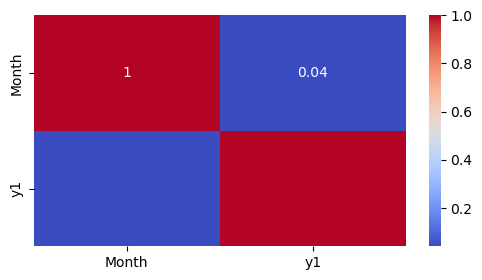

In [11]:
plt.figure(figsize=(6,3))
correlation = X.corr().round(2)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [12]:
Tue = df_train.loc[df_train["Weekday"] == 1]
corr_Tue = Tue.corr().round(2)
corr_Tue

,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,Moon Padam,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
Weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,NaN,1.00,0.02,-0.01,0.07,0.09,-0.09,0.07,0.12,-0.08,...,0.01,-0.07,0.10,0.06,0.03,-0.08,-0.08,-0.04,0.04,0.04
Month,NaN,0.02,1.00,-0.29,-0.20,-0.02,-0.30,0.02,-0.01,-0.02,...,-0.10,-0.32,0.00,0.06,-0.37,-0.06,0.03,-0.17,0.13,-0.03
Year,NaN,-0.01,-0.29,1.00,0.00,-0.06,0.09,-0.05,0.02,-0.09,...,0.03,0.05,-0.07,0.77,0.07,0.65,-0.00,-0.85,-0.06,0.24
Lagna,NaN,0.07,-0.20,0.00,1.00,0.06,-0.38,0.26,0.04,-0.02,...,0.29,-0.29,0.05,0.19,0.08,-0.13,0.15,0.08,-0.02,0.07
Lagna Padam,NaN,0.09,-0.02,-0.06,0.06,1.00,-0.07,-0.12,-0.05,-0.07,...,-0.09,-0.04,0.03,-0.13,0.12,-0.06,-0.02,0.09,-0.11,-0.02
Sun,NaN,-0.09,-0.30,0.09,-0.38,-0.07,1.00,-0.18,-0.01,0.06,...,-0.14,0.46,0.00,-0.30,0.14,0.17,0.09,0.01,0.12,-0.04
Sun Padam,NaN,0.07,0.02,-0.05,0.26,-0.12,-0.18,1.00,0.12,-0.10,...,0.18,-0.21,-0.07,0.13,-0.19,-0.10,-0.05,0.04,-0.01,0.01
Moon,NaN,0.12,-0.01,0.02,0.04,-0.05,-0.01,0.12,1.00,-0.01,...,0.02,-0.06,-0.09,-0.01,0.08,0.00,0.06,0.00,-0.06,0.05
Moon Padam,NaN,-0.08,-0.02,-0.09,-0.02,-0.07,0.06,-0.10,-0.01,1.00,...,-0.06,0.07,0.05,-0.10,0.04,0.05,0.20,0.12,-0.08,0.04


In [13]:
Tue.head()

,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,Moon Padam,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,1,4,1,0,10,3,20,3,22,3,...,1,21,1,22,3,3,3,17,1,18
2,1,11,1,0,10,4,21,1,2,3,...,1,20,3,22,3,3,3,17,1,4
4,1,18,1,0,11,2,21,3,8,4,...,2,20,2,22,3,3,3,17,1,3
6,1,25,1,0,11,3,22,1,15,3,...,2,20,2,22,4,3,3,17,1,6
8,1,1,2,0,12,1,22,3,23,2,...,2,20,2,22,4,3,3,17,1,1


In [14]:
X = Tue[:][["Lagna","Moon","y1"]]
X.head(3)

,Lagna,Moon,y1
0,10,22,18
2,10,2,4
4,11,8,3


In [15]:
X.corr().round(2)

,Lagna,Moon,y1
Lagna,1.00,0.04,0.07
Moon,0.04,1.00,0.05
y1,0.07,0.05,1.00


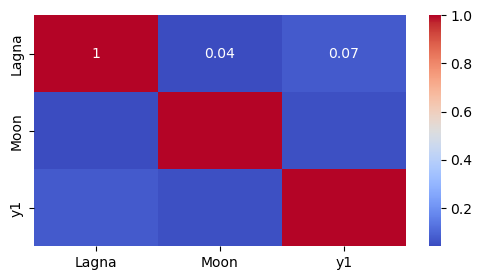

In [16]:
plt.figure(figsize=(6,3))
correlation = X.corr().round(2)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()